### Aprendizaje Automático: Regresión Lineal con Python y Scikit-Learn

#### Requisitos Previos
- Conocimientos básicos de Python
- Familiaridad con la biblioteca Pandas para manipulación de datos
- Conceptos básicos de Estadística 

#### Contenidos
1. Regresión Lineal
   - Introducción
   - Implementación en Python
   - Interpretación de Resultados
   - Métricas de Desempeño


### 1. Regresión Lineal

#### Introducción
La regresión lineal es una técnica estadística que se utiliza para modelar y analizar las relaciones entre una variable dependiente y una o más variables independientes. El objetivo es encontrar la línea que mejor se ajuste a los datos.

#### Implementación en Python

**Paso 1: Importar las bibliotecas necesarias**


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Paso 2: Cargar y preparar los datos** (Datos artificiales)


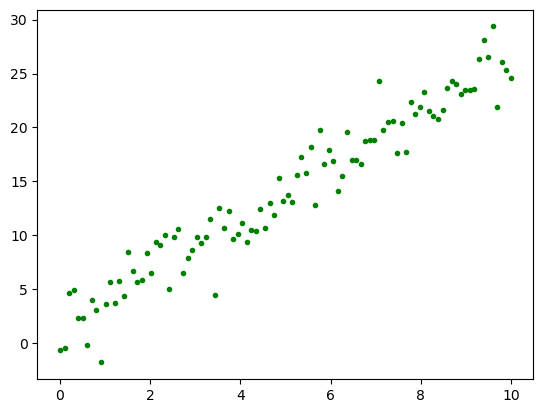

In [11]:
npoints = 100
x       = np.linspace(0,10,npoints)
sigma_e = 2
data    = pd.DataFrame({
    'x':x,
    'y': 2.5 *x  + 1.5 + sigma_e*np.random.randn(npoints)
})

X = data[['x']]
y = data['y']
#y = 2.5*x + 1.5 + error
plt.plot(X,y,".g")

In [32]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# utilizamos una semilla para scikit learn para que siempre tome los mismos
# datos (aun así es aleatorio, pero solo la primera vez, de ahí en adelante sigue
# tomando los mismos para que los resultados se mantengan)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=39)

**Paso 3: Entrenar el modelo**

In [34]:
 #inicializar el modelo
 #ajustarlo
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

# score es calculado con R^2
print(f'R^2 del modelo (1 mejor): {model.score(X_train, y_train)}')
print(f'Coeficiente: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

R^2 del modelo (1 mejor): 0.9399732895526575
Coeficiente: [2.49754399]
Intercepto: 1.365698215070962


El modelo lineal es el siguiente, donde obtenemos un valor $y$ dependiendo de la independiente $x$ y los coeficientes obtenidos:

$${h(x) = 1.3657 + 2.4975x}$$

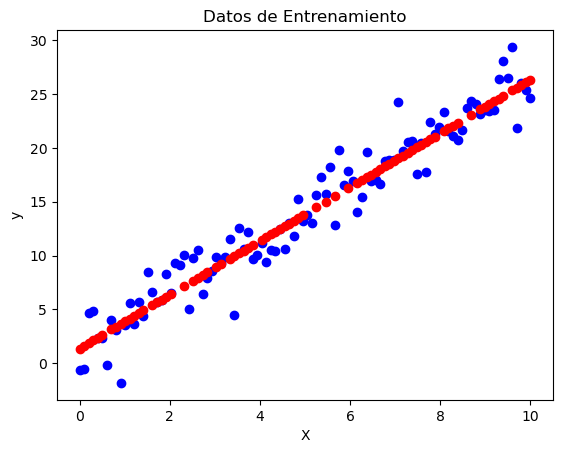

In [39]:
y_result_trained = model.predict(X_train)

#visualizar datos y el modelo
plt.scatter(X, y, color='blue')
plt.scatter(X_train, y_result_trained, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos de Entrenamiento')
plt.show()

**Paso 4: Hacer predicciones**

In [51]:
# utilizamos predict y usamos X_test
y_pred = model.predict(X_test)
y_pred

array([ 6.91579598, 14.73638828, 22.55698059, 15.74549697, 23.3138121 ,
       15.99777414,  8.68173618,  6.66351881, 22.80925776, 21.29559473,
        7.42035032, 15.24094263, 16.50232848, 14.23183394,  9.43856769,
       11.20450789,  2.87936124, 13.97955677, 25.0797523 ,  5.14985578])

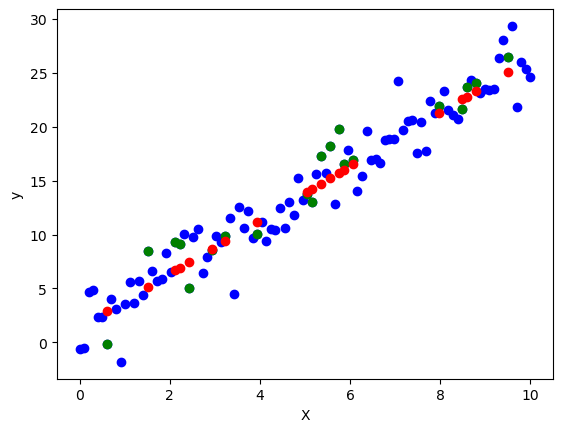

In [53]:
#visualizar el modelo, los datos de entrenamiento, los datos de prueba y las predicciones
plt.scatter(X, y, color='blue')
plt.scatter(X_test, y_test, color='green')
plt.scatter(X_test, y_pred, color='red') 
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### Interpretación de Resultados



El coeficiente y el intercepto nos indican la pendiente de la línea y dónde corta el eje y, respectivamente.


#### Métricas de Desempeño

**Error Cuadrático Medio (MSE) y Coeficiente de Determinación (R²)**


In [55]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 3.860420451880292
R²: 0.9195790586541949


- **MSE**: Mide el promedio de los cuadrados de los errores, es decir, la diferencia entre los valores predichos y los reales.
- **R²**: Indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.


# Ejercicio

Usar la base de datos Housing para estimar un modelo de regresión lineal empleando en orden las variables que tengan mayor correlación con la variable objetivo

**Recordatorio**: 
cargar datos en colab

```python
from google.colab import drive
drive.mount('/content/drive')
root = "/content/drive/My Drive/"

archivo = root + "RUTA AL ARCHIVO"

#cargar archivo

```

In [1]:
import pandas as pd
df=pd.read_csv("data/housing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.300774,0.590822,0.013922,0.634679,-0.190197,0.482013,-0.499501,0.838671,0.793392,0.362615,-0.377013,0.481907,-0.362077
ZN,-0.300774,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.590822,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.013922,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.634679,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.190197,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.482013,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.499501,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.838671,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.793392,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [3]:
df.corr(method ='spearman')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.567777,0.729752,0.064145,0.813245,-0.285634,0.685120,-0.713165,0.704266,0.709901,0.444948,-0.336171,0.596589,-0.515923
ZN,-0.567777,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
INDUS,0.729752,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
CHAS,0.064145,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
NOX,0.813245,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
RM,-0.285634,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
AGE,0.685120,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
DIS,-0.713165,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
RAD,0.704266,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
TAX,0.709901,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


**Probar con la variable que tiene correlación positiva más alta: RM**

In [49]:
# Seleccionar predictores y variable objetivo
X = df[["RM"]]
y = df['MEDV']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MSE: 46.144775347317264
R²: 0.3707569232254778


**Probar con la variable que tiene correlación más alta (valor absoluto): LSTAT**

MSE: 33.51954917268488
R²: 0.5429180422970386


## Normalizar variables

La normalización también se ajusta con el conjunto de entrenamiento y se aplica tando a entrenamiento como a prueba. En SKLEARN contamos con varias tecnicas de normalización.

**Ejercicio**: cosultar sobre los siguientes métodos. Traer la descripción matemática
```
MinMaxScaler
Normalizer
StandardScaler
```

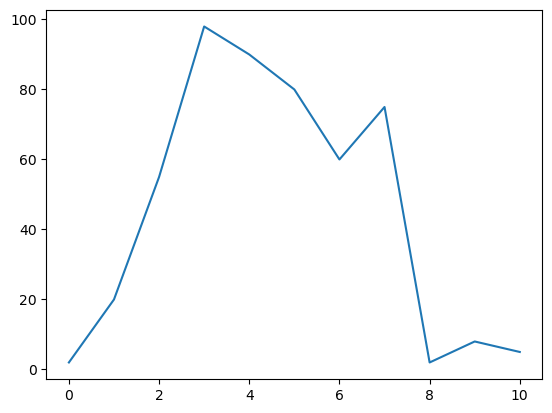

In [7]:
import numpy as np
x = np.array([2,20,55,98,90,80,60,75,2,8,5])
plt.plot(x)

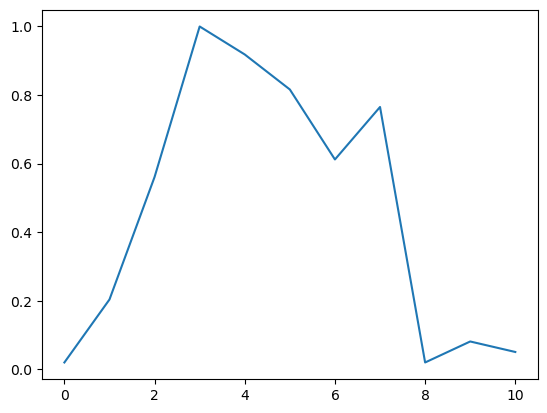

In [8]:
x = np.array([2,20,55,98,90,80,60,75,2,8,5])/x.max()
plt.plot(x)

In [10]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

scaler  = MinMaxScaler() ## solo probaremos con MinMax
#scaler  = Normalizer()
#scaler  = StandardScaler()

# Seleccionar predictores y variable objetivo
X = df[["LSTAT"]]
y = df["MEDV"]
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ajustar scaler
scaler.fit(X_train)
#aplicar scaler
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)   

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

print(f'MSE: {mse}')
print(f'R²: {r2}')

Coeficientes: [-4.40223071  3.84920663 -0.27313015  0.10296379]
Intercepto: 22.796534653465343
MSE: 30.90600810321565
R²: 0.5785570200892449


### Ejercicio 1
Probar con `Normalizer` y `StandardScaler` y comparar resultados

**Uso de statmodels**: statmodels es una librería que permite estimar modelos de regresión lineal y genera información adicional que puede ser util en el proceso de interpretar los resultados

In [12]:
import statsmodels.formula.api as sm
lm1   = sm.ols(formula = 'MEDV~LSTAT', data = df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           5.08e-88
Time:                        16:45:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

### Ejercicio 2

El conjunto de datos a usar es ``phone.csv``. Este conjunto de datos es una colección de información sobre varios tipos de teléfonos móviles. Es un conjunto de datos depurado, disponible para principiantes que desean aprender a implementar algoritmos de machine learning sin tener que dedicar tiempo a limpiar los datos. Puedes concentrarte únicamente en construir tus modelos.

Las columnas disponibles en el conjunto de datos son:

    Ratings (Calificaciones): Este campo contiene las diversas calificaciones dadas por los clientes.
    Ram: Este campo contiene la capacidad de la memoria RAM del teléfono en GB.
    ROM: Este campo contiene la cantidad de espacio disponible en el teléfono en GB.
    Mobile_Size (Tamaño del móvil): Este es el tamaño de la pantalla en pulgadas.
    Primary_Cam (Cámara principal): Este es el número de píxeles de la cámara trasera.
    Selfi_Cam (Cámara frontal): El número de píxeles de la cámara frontal.
    Battery_Power (Potencia de la batería): La potencia de la batería.
    Price (Precio): El precio del teléfono móvil en INR (rupias indias).

Todos los campos ya están en valores numéricos, ya sea enteros o flotantes. La variable objetivo es el precio.

In [14]:
df = pd.read_csv("data/phone.csv")
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


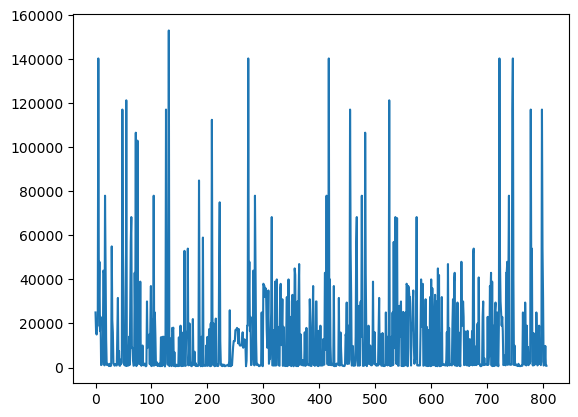

In [67]:
plt.plot(df["Price"])

In [15]:
df.corr()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
Ratings,1.000000,0.121207,0.424841,0.079125,-0.108266,-0.082678,0.448317,0.570777
RAM,0.121207,1.000000,0.332631,0.008619,0.173748,0.195685,0.032596,0.298383
ROM,0.424841,0.332631,1.000000,0.106085,-0.067326,-0.044190,0.412475,0.474928
Mobile_Size,0.079125,0.008619,0.106085,1.000000,-0.053856,-0.020676,0.131125,0.084689
Primary_Cam,-0.108266,0.173748,-0.067326,-0.053856,1.000000,0.121800,-0.059803,-0.223997
Selfi_Cam,-0.082678,0.195685,-0.044190,-0.020676,0.121800,1.000000,-0.092986,0.015791
Battery_Power,0.448317,0.032596,0.412475,0.131125,-0.059803,-0.092986,1.000000,0.369221
Price,0.570777,0.298383,0.474928,0.084689,-0.223997,0.015791,0.369221,1.000000


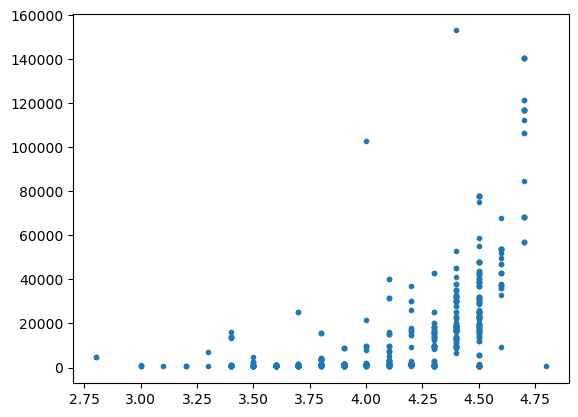

In [44]:
plt.plot(df["Ratings"],df["Price"],'.')

In [65]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

scaler  = MinMaxScaler() ## solo probaremos con MinMax
#scaler  = Normalizer()
#scaler  = StandardScaler()

# Seleccionar predictores y variable objetivo
X = df[["Ratings"]]
y = df["Price"]
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#ajustar scaler
scaler.fit(X_train)
#aplicar scaler
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)   

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

print(f'MSE: {mse}')
print(f'R²: {r2}')

Coeficientes: [69261.84359685]
Intercepto: -33526.51194037819
MSE: 272877386.78139967
R²: 0.3538572118652219


In [66]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

#scaler  = MinMaxScaler() ## solo probaremos con MinMax
#scaler  = Normalizer()
scaler  = StandardScaler()

# Seleccionar predictores y variable objetivo
X = df[["Ratings"]]
y = df["Price"]

X = X**2
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#ajustar scaler
scaler.fit(X_train)
#aplicar scaler
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)   

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Coeficientes: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

print(f'MSE: {mse}')
print(f'R²: {r2}')

Coeficientes: [13922.84796623]
Intercepto: 14287.049612403103
MSE: 261671459.99185935
R²: 0.3803915790578696
